# <h1 style='text-align : center; color:green'> 911 Calls Project </h1> <br>
<p style='float:right'> Aamir Mohiuddin Malla </p>

---

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


### Data and SetUp
---

In [1]:
#importing libraries
import numpy as np
import pandas as pd

In [3]:
#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read and Check Data
---

In [4]:
#Dataframe
CallsData = pd.read_csv('Datasets/911.csv')

In [6]:
#Copy the Original Dataset
df = CallsData.copy(deep = True)

In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


## Some Basic Questions
---

**1. Top 5 zipcodes for 911 Calls**

In [9]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**2. What are the top 5 townships(twp) for 911 Calls?**

In [10]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**3. How many unique title codes are there?**

In [11]:
df['title'].nunique()

110

In [13]:
#or we can do this as
len(df['title'].unique())

110

### Creating New Features
---

**4.** *In the **titles** column there are "Reason/Deppt" specified. These are EMS, Fire and Traffic. Based on this information we can create a new column of "Reasons" that contains coressponding reason string value.*

*E.g: If the title column value is EMS: BACK PAINS/INJURY, the Reason Column value would be EMS*

In [14]:
df['Reasons'] = df['title'].apply(lambda x : x.split(':')[0])

In [16]:
#check new column
df['Reasons']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reasons, Length: 99492, dtype: object

**5. What is the Most Common Reason for a 911 call based of this new Reason column?**

In [19]:
df['Reasons'].value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: Reasons, dtype: int64

In [21]:
#unique values in Reason
df['Reasons'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

### Visualizing the Information
---

**6. Number of Calls Count based on Reason.** 

[Text(0.5, 0, 'Reason of Call'),
 Text(0, 0.5, 'No.Of Calls'),
 Text(0.5, 1.0, 'Reasons and Calls')]

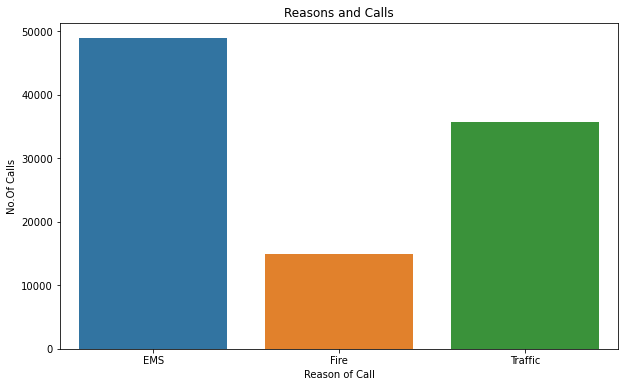

In [34]:
plt.figure(figsize=(10,6))
fig = sns.countplot(x='Reasons',data=df)
fig.set(xlabel="Reason of Call", ylabel="No.Of Calls", title="Reasons and Calls")